CLASSIFICATION PROBLEM- TITANIC DATASET

In [1]:
from google.colab import files        #uploading file titanic.csv
uploaded=files.upload()

In [ ]:
import pandas as pd                   #importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('titanic.csv')         #reading file
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()         #to display first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()        #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df.columns)   #to print all column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
sorted(df)         #to print in alphabetical order

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket']

In [ ]:
df['Cabin'].value_counts()     #count the values in column

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
A14            1
B102           1
A26            1
C45            1
C118           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.isnull().any()    # to check whether there is any null value

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

AxesSubplot(0.125,0.125;0.62x0.755)


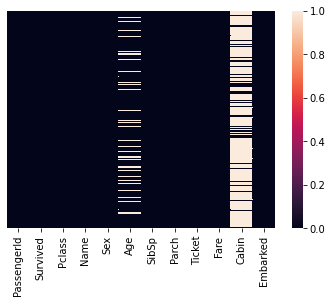

In [ ]:
print(sns.heatmap(df.isnull(),yticklabels=False))  #plot heatmap

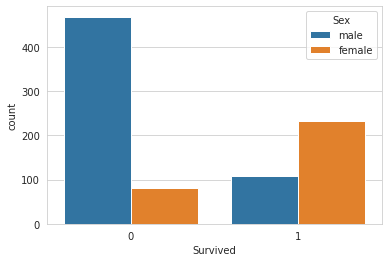

In [ ]:
sns.set_style('whitegrid')    #plotting survived columns using countplot
sns.countplot(x='Survived',hue='Sex',data=df)

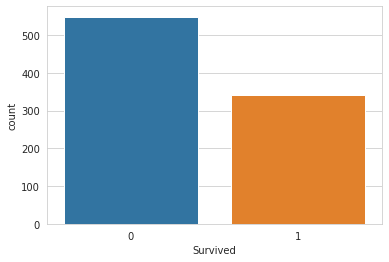

In [ ]:
sns.countplot(x='Survived',data=df)

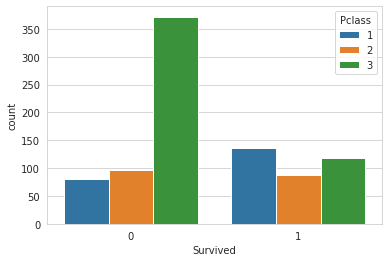

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


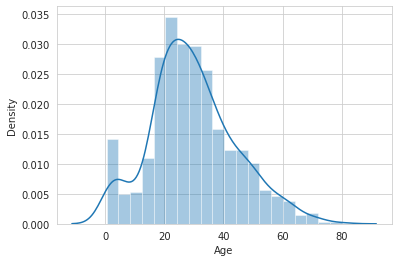

In [ ]:
sns.distplot(df['Age'].dropna())   #plot distplot

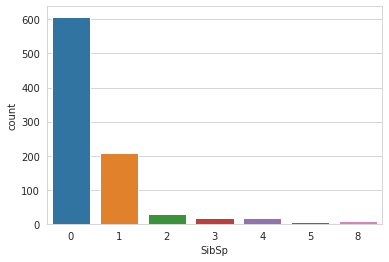

In [ ]:
sns.countplot(x='SibSp',data=df)

In [ ]:
age_mean=df['Age'].mean()  #calculating mean of column age

In [ ]:
age_mean

29.69911764705882

In [ ]:
df['Age']=df['Age'].fillna(age_mean)   #filling null values in age column using its mean
print(df['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [ ]:
df['Age'].isnull().any()

False

In [ ]:
df['Cabin']=df['Cabin'].fillna(method='bfill') #filling null values in cabin using bfill

In [ ]:
df['Embarked']=df['Embarked'].fillna('p')

In [ ]:
from sklearn import preprocessing     #performing label encoding to convert categorical data into numeriacal data
le=preprocessing.LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Embarked'].unique()

array([2, 0, 1, 3])

In [ ]:
df=df.drop(['Name','PassengerId','Ticket','Embarked'],axis=1)  # to drop columns

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,0,1
1,1,1,38.0,1,0,71.2833,C85,1,0
2,1,3,26.0,0,0,7.9250,NaN,1,0
3,1,1,35.0,1,0,53.1000,C123,1,0
4,0,3,35.0,0,0,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,0,1
887,1,1,19.0,0,0,30.0000,B42,1,0
888,0,3,NaN,1,2,23.4500,NaN,1,0
889,1,1,26.0,0,0,30.0000,C148,0,1


In [ ]:
from sklearn import  preprocessing    # to perform one hot encoding to convert categorical data into numerical data
df=pd.get_dummies(df,columns=['Sex'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,C85,0,1
1,1,1,38.000000,1,0,71.2833,C85,1,0
2,1,3,26.000000,0,0,7.9250,C123,1,0
3,1,1,35.000000,1,0,53.1000,C123,1,0
4,0,3,35.000000,0,0,8.0500,E46,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,B42,0,1
887,1,1,19.000000,0,0,30.0000,B42,1,0
888,0,3,29.699118,1,2,23.4500,C148,1,0
889,1,1,26.000000,0,0,30.0000,C148,0,1


In [ ]:
from sklearn.model_selection import train_test_split  #splitting train data and test data
x=df[['Pclass','Age','Sex_female','Sex_male']]
y=df[['Survived']]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(712, 4)

In [ ]:
y_train.shape

(712, 1)

In [ ]:
x_test.shape

(179, 4)

In [ ]:
y_test.shape

(179, 1)

Following 8 classification models  is performed and find its accuracy score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
a=KNeighborsClassifier()
a.fit(x_train,y_train)
b=a.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,b)

0.7318435754189944

In [ ]:
print(b)

[0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1]


In [ ]:
y_test

,Survived
106,1
244,0
484,1
363,0
374,0
...,...
518,1
510,1
872,0
416,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
c=RandomForestClassifier()
c.fit(x_train,y_train)
d=c.predict(x_test)
accuracy_score(y_test,d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7653631284916201

In [ ]:
from sklearn.tree import DecisionTreeClassifier
e=DecisionTreeClassifier()
e.fit(x_train,y_train)
f=e.predict(x_test)
accuracy_score(y_test,f)


0.770949720670391

In [ ]:
from sklearn.linear_model import LogisticRegression
g=LogisticRegression()
g.fit(x_train,y_train)
h=g.predict(x_test)
accuracy_score(y_test,h)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8379888268156425

In [ ]:
from sklearn.svm import SVC
i=SVC()
i.fit(x_train,y_train)
j=i.predict(x_test)
accuracy_score(y_test,j)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5363128491620112

In [ ]:
from xgboost import XGBClassifier
k=XGBClassifier()
k.fit(x_train,y_train)
l=k.predict(x_test)
accuracy_score(y_test,l)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7430167597765364

In [ ]:
from sklearn.naive_bayes import GaussianNB
m=GaussianNB()
m.fit(x_train,y_train)
n=m.predict(x_test)
accuracy_score(y_test,n)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8100558659217877

In [ ]:
from sklearn.naive_bayes import MultinomialNB
o=MultinomialNB()
o.fit(x_train,y_train)
p=o.predict(x_test)
accuracy_score(y_test,p)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8100558659217877

In [ ]:
from sklearn.metrics import confusion_matrix
q=confusion_matrix(y_test,p)
q

array([[87,  9],
       [25, 58]])

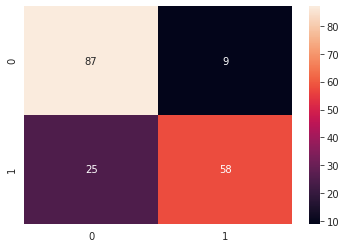

In [ ]:
sns.heatmap(q,annot=True)